In [7]:
import numpy as np

class LinearRegression:
    def __init__(self, lr = 0.01, n_iter = 400):
        self.lr = lr
        self.n_iter = 400
        self.weights = None
        self.bias = None

    def fit(self,X,y):

        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_predicted = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
            db = (1/n_samples) * np.sum(y_predicted-y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self,X):
        y_predicted = np.dot(X,self.weights) + self.bias
        return y_predicted


33.69636618160963


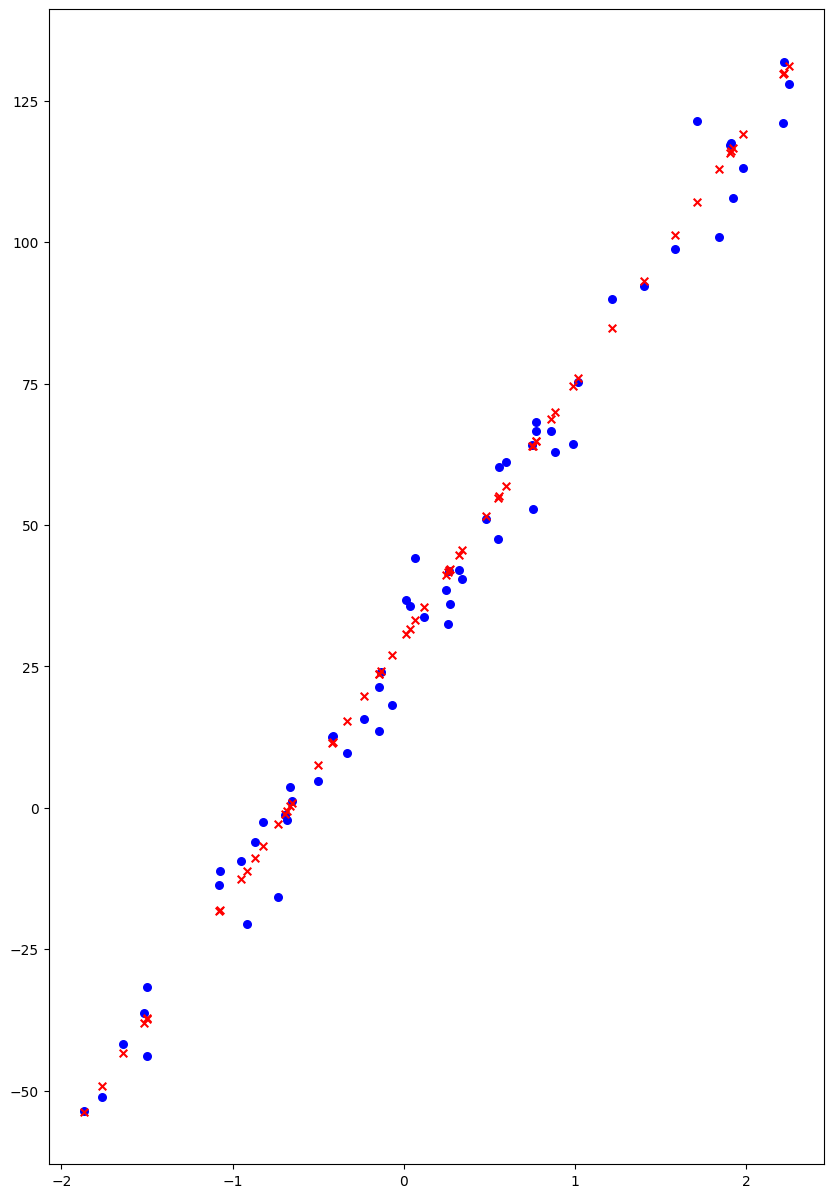

In [12]:
import numpy as np
import pandas as  pd

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import importlib.util
spec = importlib.util.spec_from_file_location("linear_regression", "/content/programs/linear_regression.py")
lr_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lr_module)

LinearRegression = lr_module.LinearRegression


X, y = make_regression(n_samples=300, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
m = 200


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

#fig = plt.figure(figsize=(10,15))

#plt.scatter(X[:,0],y, color="b" , marker="o",s = 30)
#plt.show()

#print(X_train.shape)
#print(y_train.shape)



reg = LinearRegression(0.025,1000)
reg.fit(X_train,y_train)

predicted = reg.predict(X_test)

def mse(y_hat,y):
    return np.mean((y_hat - y)**2)


print(mse(predicted,y_test))

fig = plt.figure(figsize=(10,15))

plt.scatter(X_test[:,0],y_test, color="b" , marker="o",s = 30)
plt.scatter(X_test[:,0],predicted, color="r" , marker="x",s = 30)
plt.show()
